# Exploratory Data Analysis

## Imports

In [ ]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [2]:
os.chdir("..")

from src.preprocessing import preprocess_data

## Carregamento e tratamento dos dados

In [3]:
if not os.path.exists("data/ev_charging_patterns.csv"):
    df_original = pd.read_csv(kagglehub.dataset_download("valakhorasani/electric-vehicle-charging-patterns", path='ev_charging_patterns.csv'))
    df_original.to_csv("data/ev_charging_patterns.csv", index=False)
else:
    df_original = pd.read_csv("data/ev_charging_patterns.csv")
df_original.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [4]:
if not os.path.exists("data/ev_charging_patterns_preprocessed.csv"):
    df_preprocessed = preprocess_data(df_original).dropna()
    df_preprocessed.to_csv("data/ev_charging_patterns_preprocessed.csv", index=False)
else:
    df_preprocessed = pd.read_csv("data/ev_charging_patterns_preprocessed.csv")

df_preprocessed.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,Hyundai Kona,100.0,San Francisco,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
1,Hyundai Kona,50.0,Houston,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
2,Hyundai Kona,50.0,Los Angeles,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
3,Nissan Leaf,50.0,San Francisco,43.181137,1.167640,14.334523,36.900341,Evening,Saturday,75.217748,71.982288,143.680046,-5.274218,0.0,DC Fast Charger,Long-Distance Traveler
4,Chevy Bolt,75.0,Los Angeles,51.467617,2.655396,26.702908,9.796821,Afternoon,Monday,56.201703,63.786815,116.543166,-4.417460,0.0,Level 2,Long-Distance Traveler


### Separação entre categorical features, numerical features e target

In [5]:
feature_column = "User Type"

In [6]:
categorical_features = [
    "Vehicle Model",
    "Charging Station Location",
    "Time of Day",
    "Day of Week",
    "Charger Type",
]

In [7]:
numerical_features = df_preprocessed.columns.difference(categorical_features + [feature_column])
numerical_features

Index(['Battery Capacity (kWh)', 'Charging Cost (USD)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Distance Driven (since last charge) (km)', 'Energy Consumed (kWh)',
       'State of Charge (End %)', 'State of Charge (Start %)',
       'Temperature (°C)', 'Vehicle Age (years)'],
      dtype='object')

## Numerical features

Ao analisar as features numéricas, separando-as por classe e plotando boxplots, é possível observar que a distribuição de valores das features numéricas é similar entre as classes. A feature que difere um pouco mais é a `age`. Isso pode ser um indicativo de que somente utilizando as features numéricas pode não ser suficiente para separar as classes.

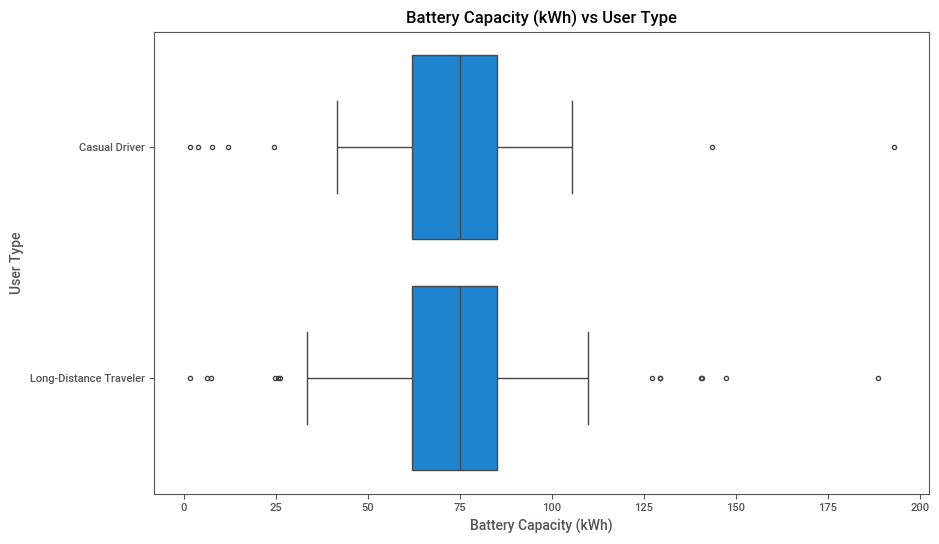

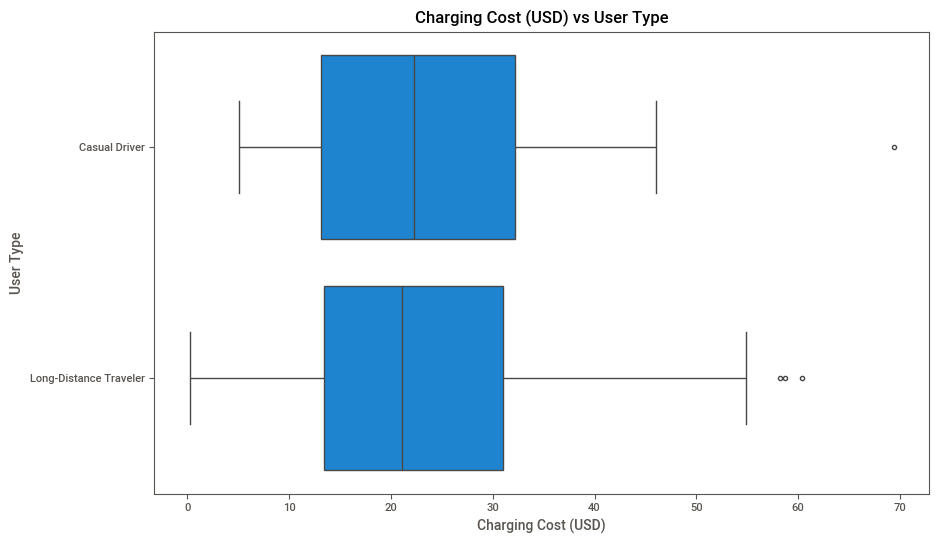

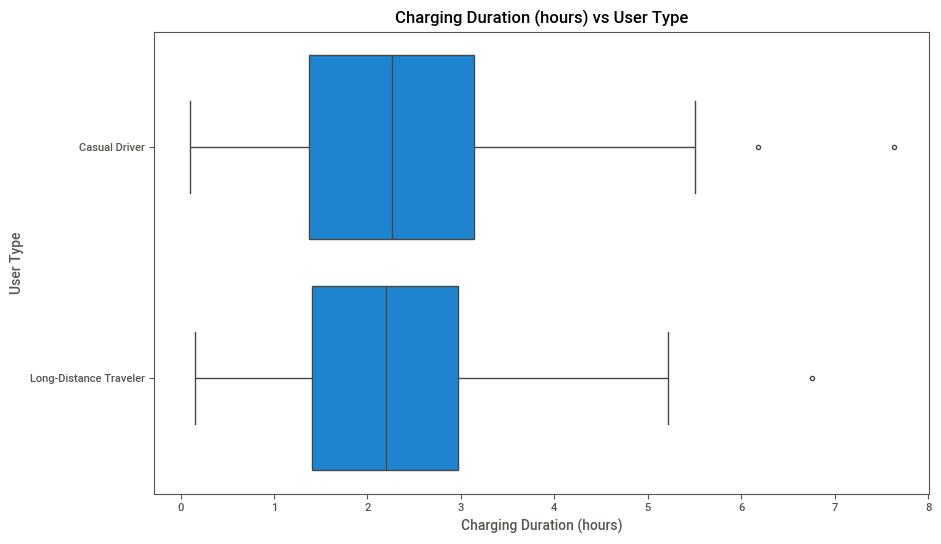

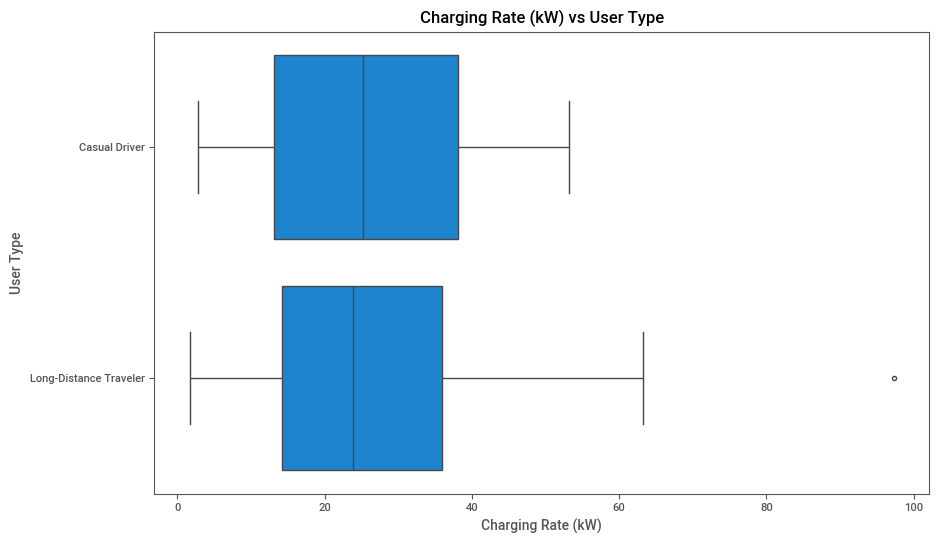

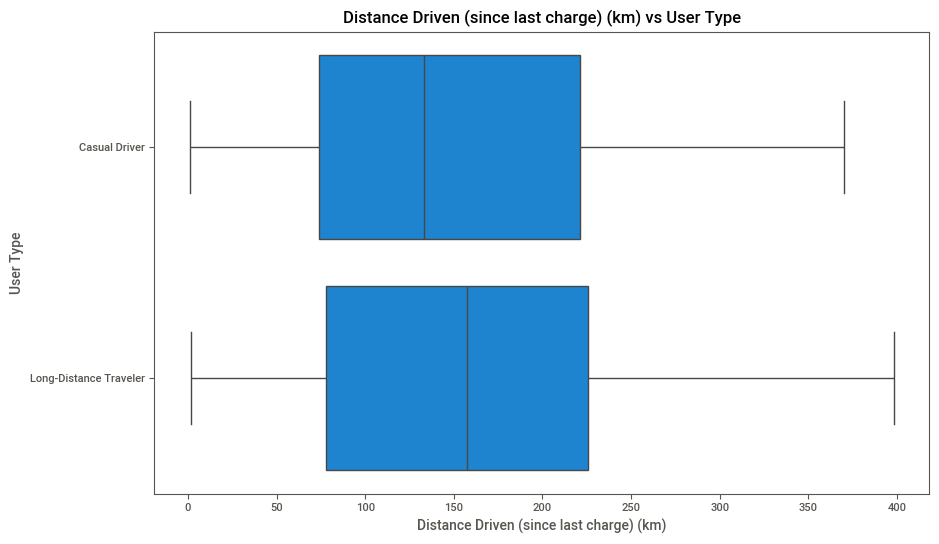

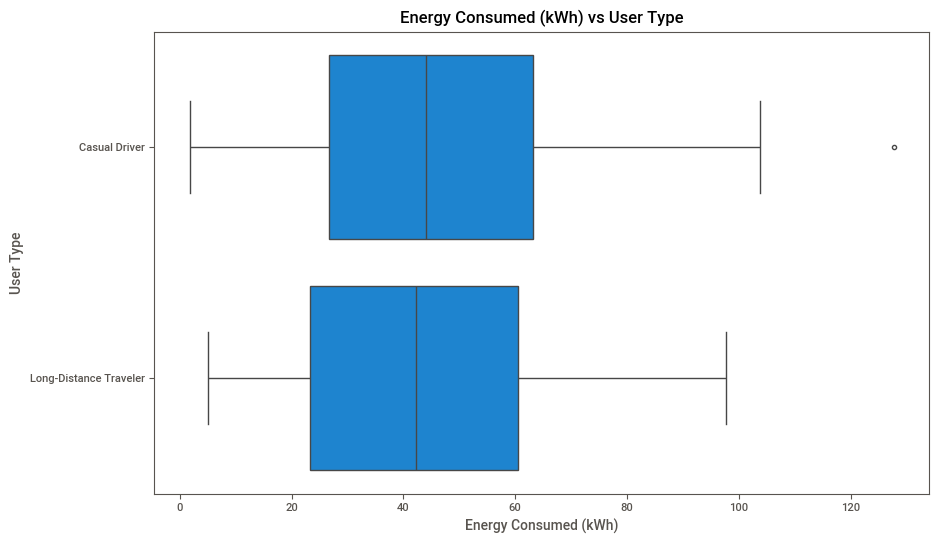

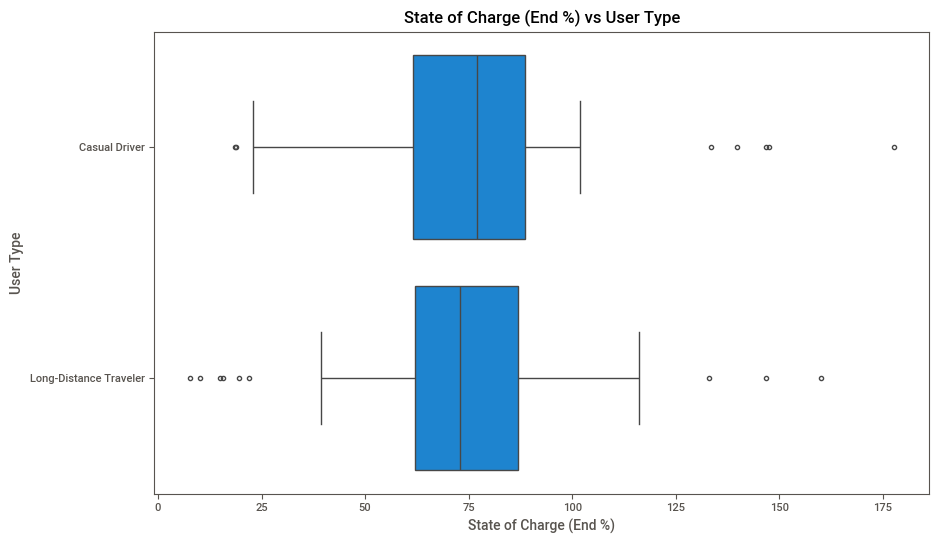

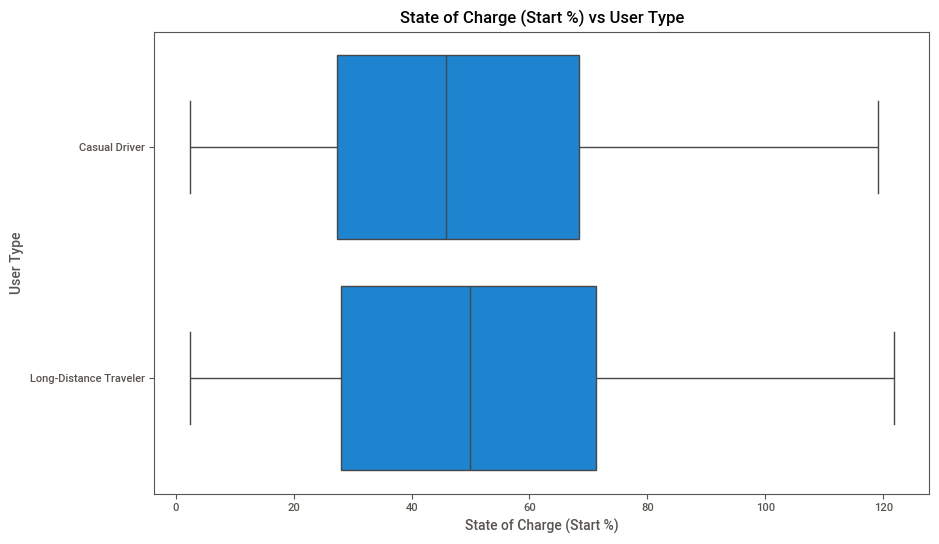

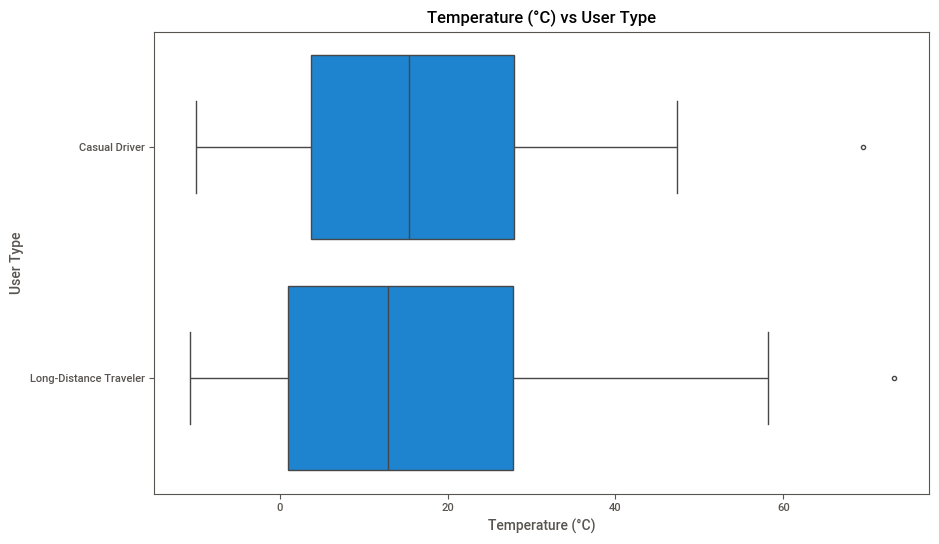

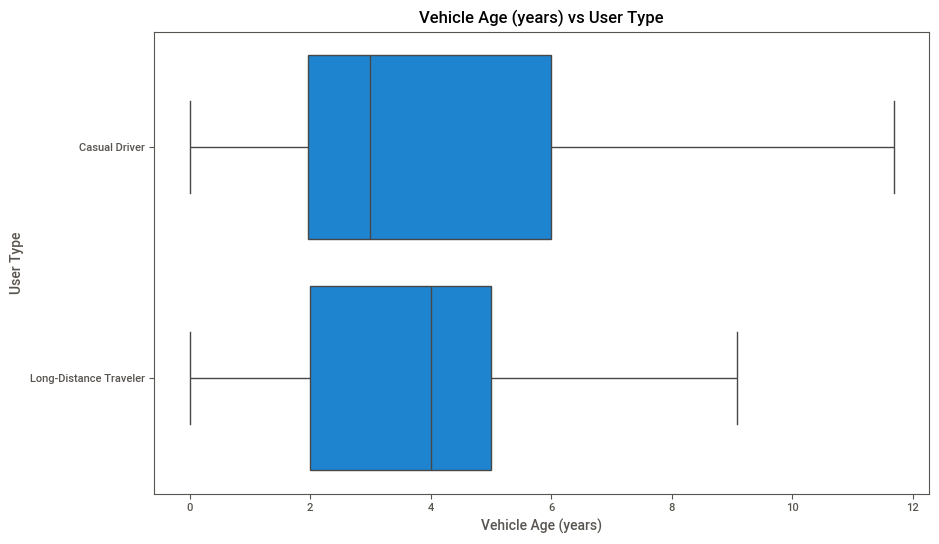

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=feature_column, data=df_preprocessed)
    plt.title(f"{feature} vs {feature_column}")
    plt.show()

Ao analisar a correlação entre as features numéricas, é possível observar que as features possuem uma correlação baixa entre si. 

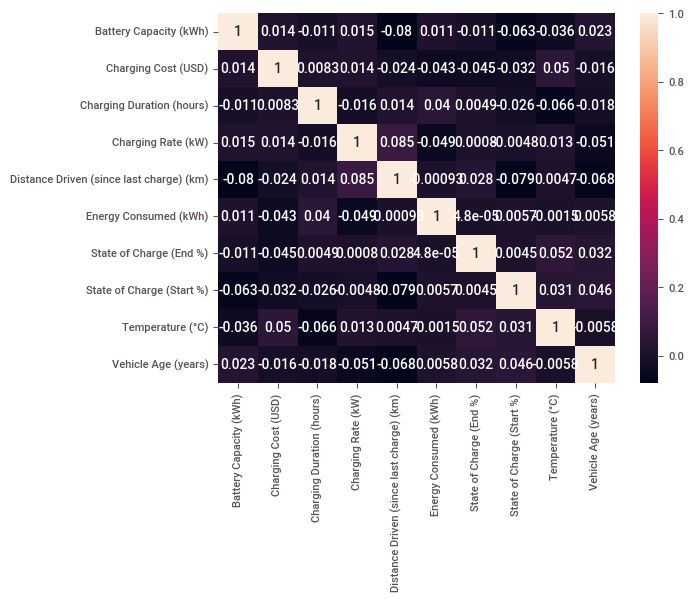

In [ ]:
corr = df_preprocessed[numerical_features].corr()
sns.heatmap(corr, annot=True)
plt.show()

## Categorical Features

Ao analisar as features categóricas, separando-as por classe e plotando gráficos de barras, é possível observar que a distribuição de probabilidades das features é bem similar entre as classes. Sendo um indicativo de que as features categóricas podem não ser suficientes para separar as classes.

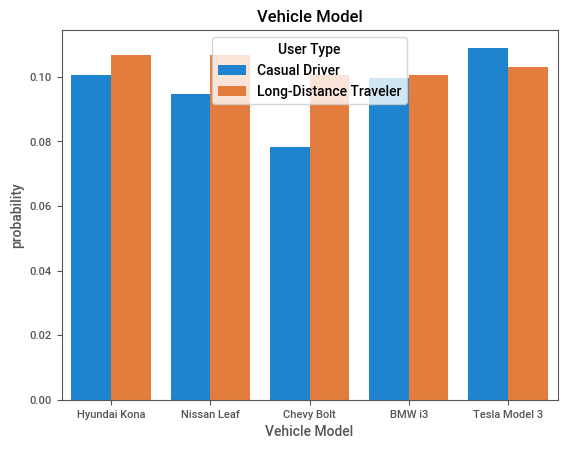

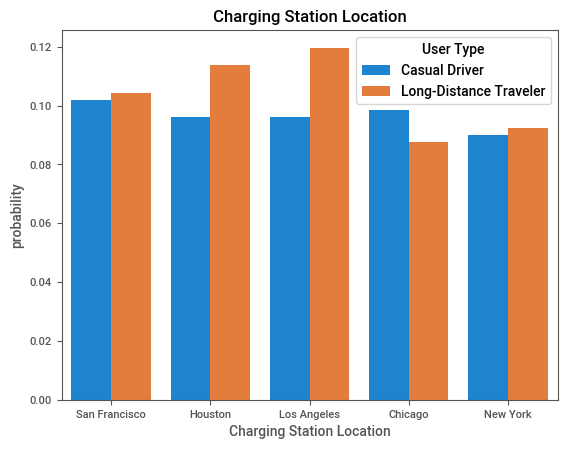

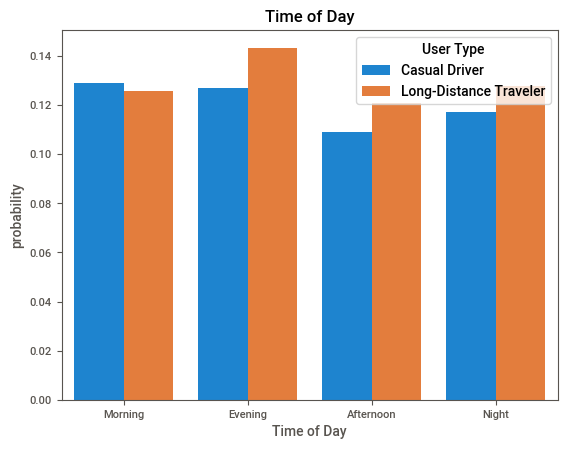

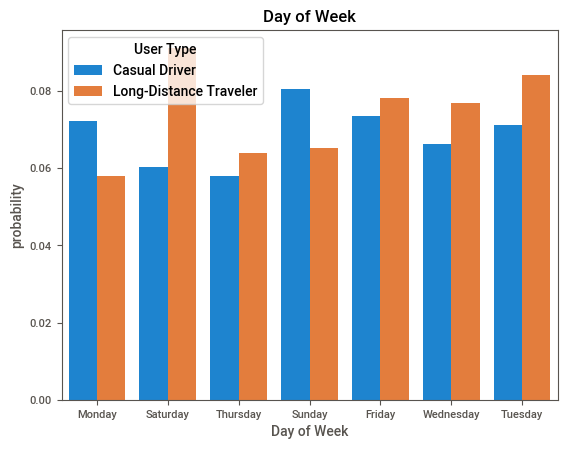

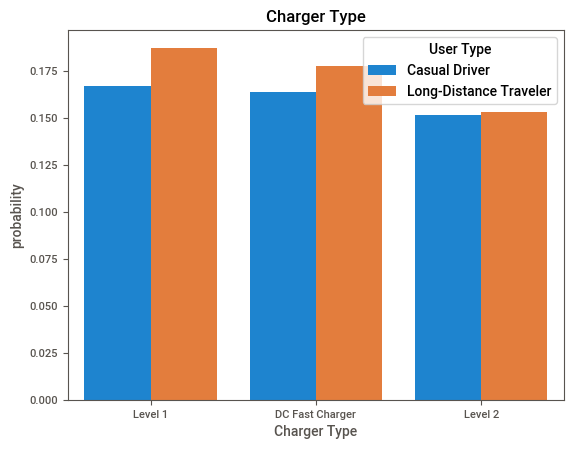

In [ ]:
for feature in categorical_features:
    sns.countplot(x=feature, data=df_preprocessed, hue=feature_column, stat="probability")
    plt.title(feature)
    plt.show()

## Pairplot

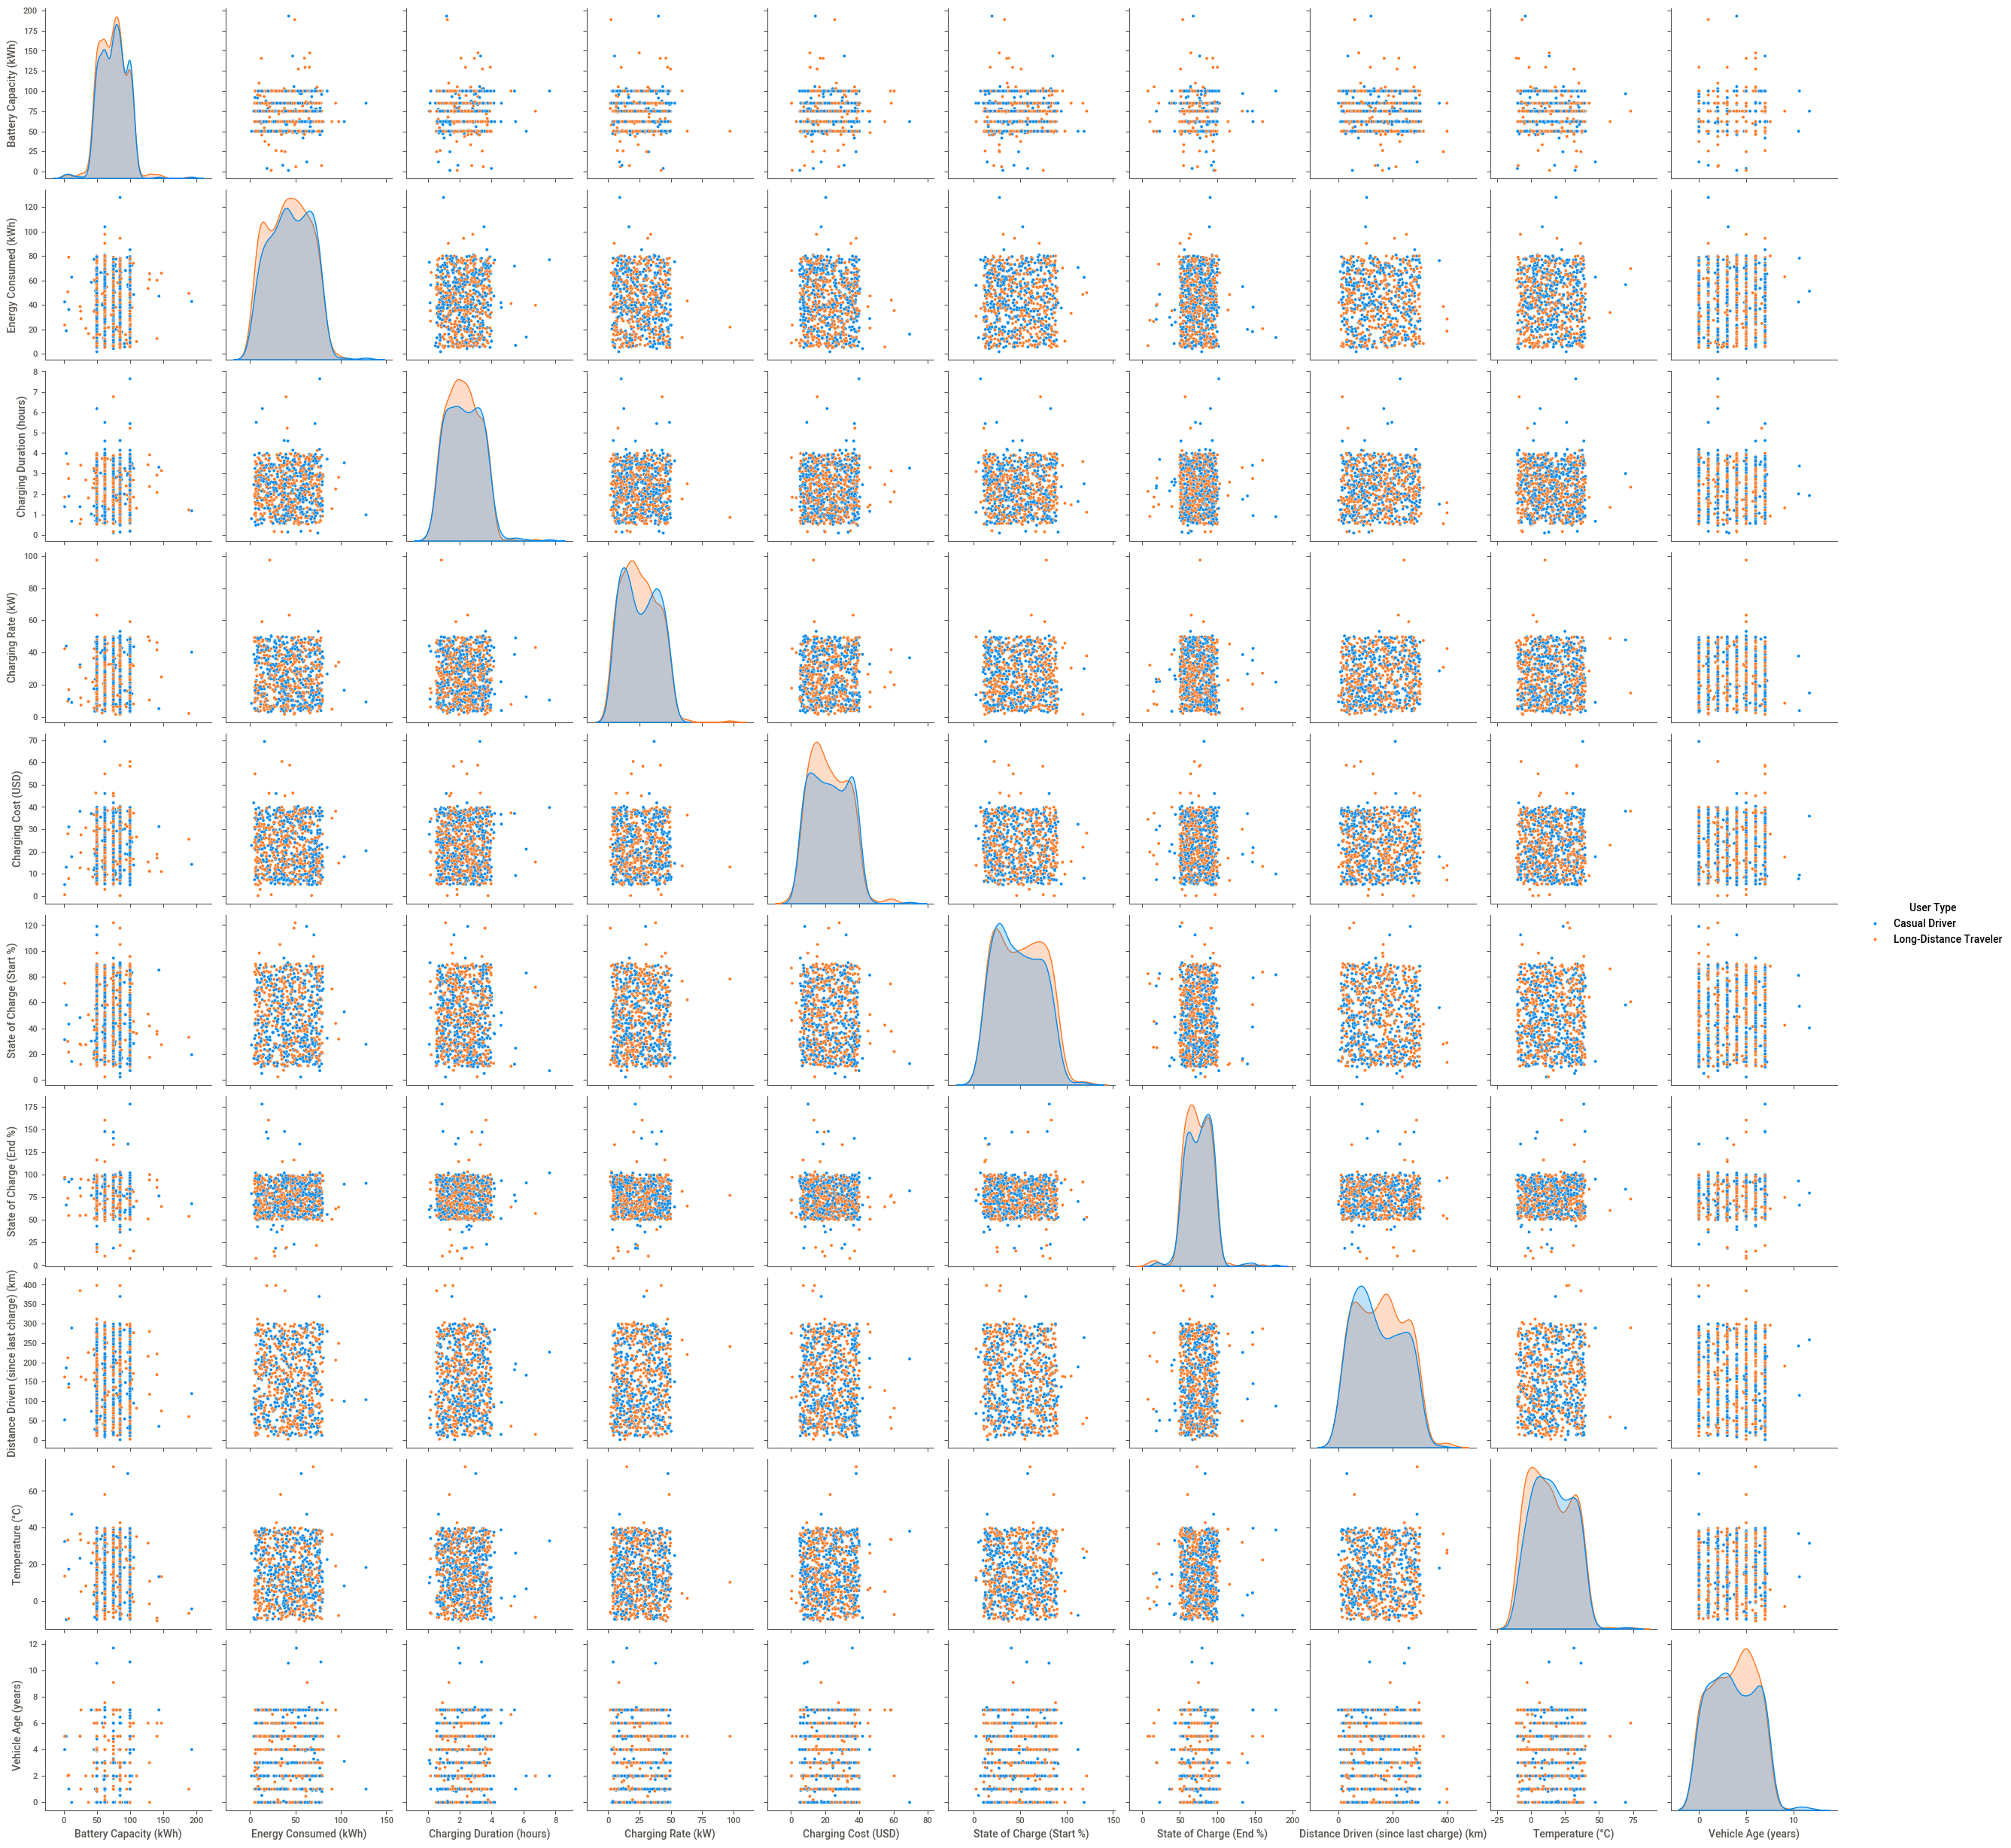

In [ ]:
sns.pairplot(df_preprocessed, hue=feature_column)
plt.show()